# Name :- Yash Gupta¶
# Roll No. :- 2301560069
# Course :- MCA
# Subject :- AIML

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

In [7]:
df = pd.read_csv('E:\KRMU\Subject\Aiml\Assignment 4\\cancer.csv')
df.head(5)

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,classes
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [8]:
df.replace('?', -99999, inplace=True)
df.drop(columns=['id'], inplace=True)
df

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,classes
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,0
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1


In [9]:
X = np.array(df.drop('classes', axis=1)) # Dropping 'classes' column to cr
X

array([[5, 1, 1, ..., 3, 1, 1],
       [5, 4, 4, ..., 3, 2, 1],
       [3, 1, 1, ..., 3, 1, 1],
       ...,
       [5, 10, 10, ..., 8, 10, 2],
       [4, 8, 6, ..., 10, 6, 1],
       [4, 8, 8, ..., 10, 4, 1]], dtype=object)

In [10]:
y = np.array(df['classes']) # Assigning the 'classes' column to the target
y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

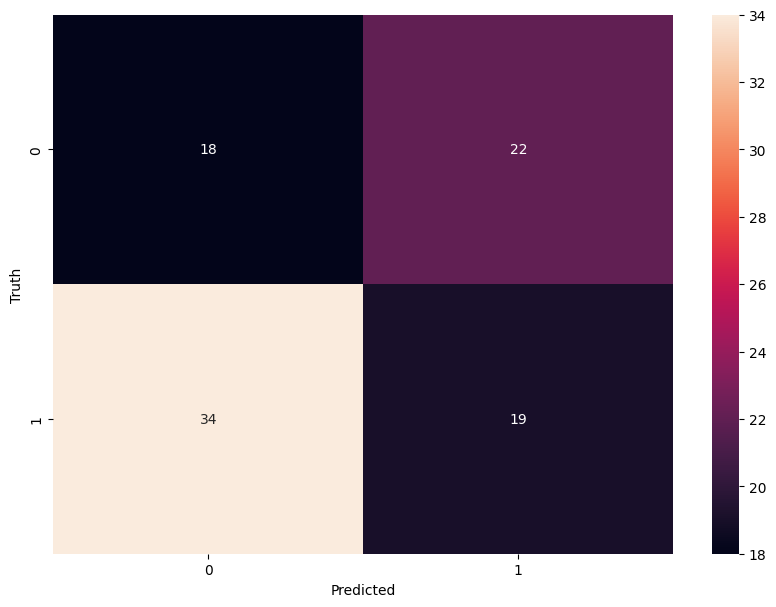

In [11]:
import seaborn as sns
cm = [[18, 22], [ 34, 19]]
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
 #principle component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance=pca.explained_variance_ratio_

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = []
for i in range(1,21):
     classifier = KNeighborsClassifier(n_neighbors=i)
     trained_model=classifier.fit(X_train,y_train)
     trained_model.fit(X_train,y_train )
 
 # Predicting the Test set results
 
     y_pred = classifier.predict(X_test)
 
 # Making the Confusion Matrix
 
     from sklearn.metrics import confusion_matrix
 
     cm_KNN = confusion_matrix(y_test, y_pred)
     print(cm_KNN)
     print("Accuracy score of train KNN")
     print(accuracy_score(y_train, trained_model.predict(X_train))*100)
     
     print("Accuracy score of test KNN")
     print(accuracy_score(y_test, y_pred)*100)
     
     knn.append(accuracy_score(y_test, y_pred)*100)


[[85 10]
 [ 7 38]]
Accuracy score of train KNN
100.0
Accuracy score of test KNN
87.85714285714286
[[91  4]
 [10 35]]
Accuracy score of train KNN
97.13774597495528
Accuracy score of test KNN
90.0
[[89  6]
 [ 2 43]]
Accuracy score of train KNN
96.77996422182468
Accuracy score of test KNN
94.28571428571428
[[91  4]
 [ 3 42]]
Accuracy score of train KNN
96.6010733452594
Accuracy score of test KNN
95.0
[[90  5]
 [ 0 45]]
Accuracy score of train KNN
96.77996422182468
Accuracy score of test KNN
96.42857142857143
[[90  5]
 [ 1 44]]
Accuracy score of train KNN
96.77996422182468
Accuracy score of test KNN
95.71428571428572
[[90  5]
 [ 0 45]]
Accuracy score of train KNN
96.77996422182468
Accuracy score of test KNN
96.42857142857143
[[90  5]
 [ 0 45]]
Accuracy score of train KNN
96.77996422182468
Accuracy score of test KNN
96.42857142857143
[[90  5]
 [ 0 45]]
Accuracy score of train KNN
96.42218246869409
Accuracy score of test KNN
96.42857142857143
[[90  5]
 [ 0 45]]
Accuracy score of train KNN
96

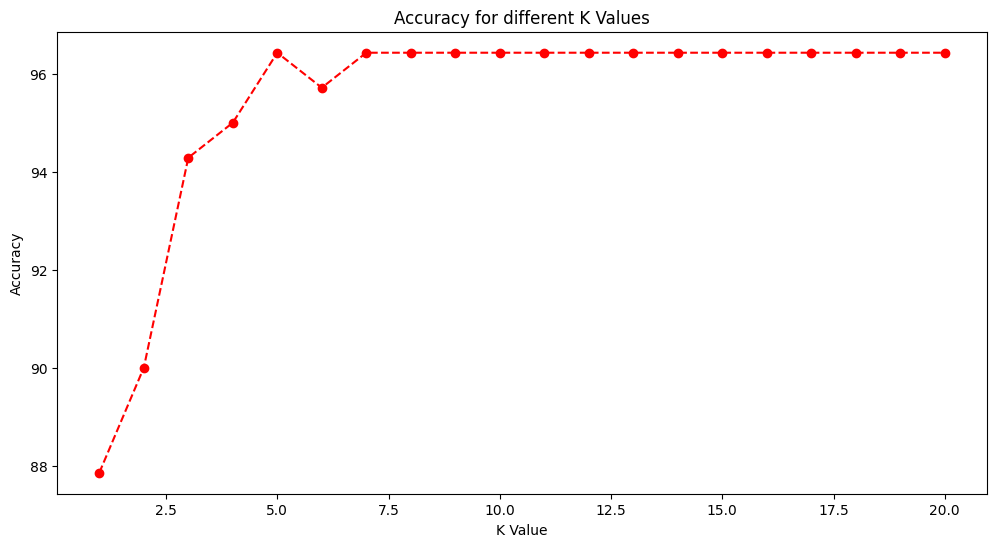

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), knn, color='red', linestyle='dashed', marker='o')
plt.title('Accuracy for different K Values')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()


In [18]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
trained_model=classifier.fit(X_train,y_train)
trained_model.fit(X_train,y_train )


SVC(kernel='linear', random_state=0)

In [20]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_SVM = confusion_matrix(y_test, y_pred)
print(cm_SVM)
print("Accuracy score of train SVM")
print(accuracy_score(y_train, trained_model.predict(X_train))*100)

[[92  3]
 [ 1 44]]
Accuracy score of train SVM
95.52772808586762


In [22]:
print("Accuracy score of test SVM")
print(accuracy_score(y_test, y_pred)*100)

Accuracy score of test SVM
97.14285714285714


In [23]:
from sklearn.preprocessing import StandardScaler
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Example query
query_data = pd.DataFrame({
 
 'unif_cell_size': [2],
 'unif_cell_shape': [3]
})
# Scale the query data using the same scaler
query_data_scaled = sc.transform(query_data)
# Make predictions for the query data
query_prediction = classifier.predict(query_data_scaled)
print(f"Predicted class for query data: {query_prediction}")

Predicted class for query data: [1]


C:\Users\yash9\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
